In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/energy_data.csv')

In [3]:
data.head(2)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20,20.70,44.700000,19.50,45.590000,21.39,41.95,20.566667,45.626667,...,43.290,20.5,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,0,21.29,37.863333,19.39,39.663333,21.79,36.70,20.463333,37.526667,...,32.095,22.0,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000


In [4]:
data.shape

(1000, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
Appliances     1000 non-null int64
lights         1000 non-null int64
T1             1000 non-null float64
RH_1           1000 non-null float64
T2             1000 non-null float64
RH_2           1000 non-null float64
T3             1000 non-null float64
RH_3           1000 non-null float64
T4             1000 non-null float64
RH_4           1000 non-null float64
T5             1000 non-null float64
RH_5           1000 non-null float64
T6             1000 non-null float64
RH_6           1000 non-null float64
T7             1000 non-null float64
RH_7           1000 non-null float64
T8             1000 non-null float64
RH_8           1000 non-null float64
T9             1000 non-null float64
RH_9           1000 non-null float64
T_out          1000 non-null float64
Press_mm_hg    1000 non-null float64
RH_out         1000 non-null float64
Windspeed      1000 non-null float64
Visibility

In [6]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,94.580000,3.880000,21.689083,40.220658,20.308276,40.456847,22.291003,39.193848,20.877548,38.883203,...,35.202685,22.110523,42.876733,19.500280,41.421305,7.270235,755.522126,79.722845,4.057964,38.219167
std,95.963705,8.075321,1.533835,3.966141,2.123854,4.080899,1.939537,3.171917,1.947205,4.297529,...,5.069127,1.877895,5.208331,1.926965,4.132533,5.207305,7.433976,14.623087,2.454295,11.679127
min,20.000000,0.000000,16.823333,28.193333,16.200000,24.823333,17.290000,33.200000,15.160000,29.421429,...,23.290000,16.583333,29.600000,15.000000,29.426667,-4.955556,730.700000,24.500000,0.000000,3.333333
25%,50.000000,0.000000,20.790000,37.200000,18.790000,38.057500,20.823333,36.900000,19.566667,35.484167,...,31.352738,20.910625,39.200000,18.100000,38.421429,3.537500,750.800000,70.000000,2.000000,28.666667
50%,60.000000,0.000000,21.600000,39.700000,19.890000,40.400000,22.100000,38.500000,20.760000,38.290000,...,34.609111,22.200000,42.352333,19.500000,40.566667,6.841667,755.941667,83.833333,3.666667,40.000000
75%,100.000000,0.000000,22.533333,42.861667,21.390000,43.200000,23.390000,41.500000,22.100000,41.992500,...,39.000000,23.441857,46.430694,20.600000,44.308333,10.433333,760.937500,91.333333,5.666667,40.000000
max,800.000000,40.000000,26.066667,54.800000,29.100000,53.249880,28.867143,49.930000,26.100000,50.963333,...,49.444444,27.100000,56.598333,24.434000,52.700000,25.600000,772.200000,100.000000,13.000000,65.000000


In [7]:
data=data.drop('lights',axis=1)

In [8]:
data.head(2)


,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20.70,44.700000,19.50,45.590000,21.39,41.95,20.566667,45.626667,18.06,...,43.290,20.5,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,21.29,37.863333,19.39,39.663333,21.79,36.70,20.463333,37.526667,19.39,...,32.095,22.0,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000


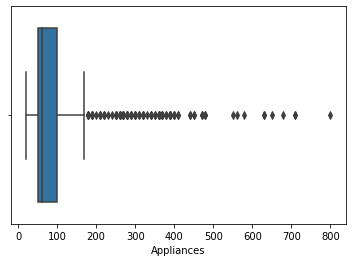

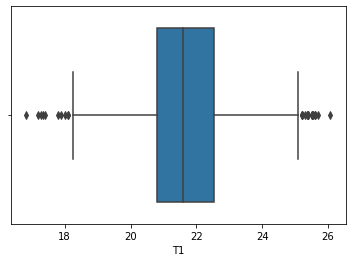

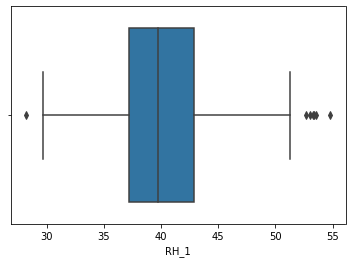

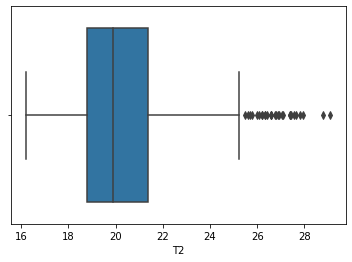

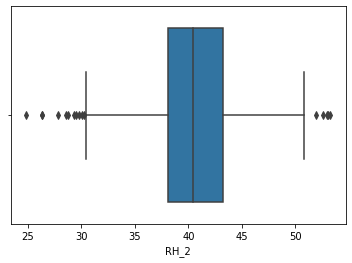

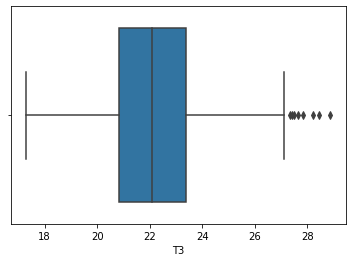

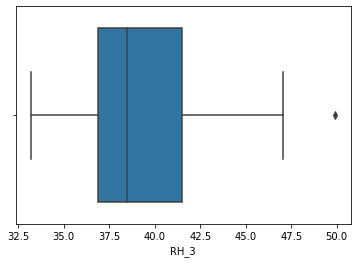

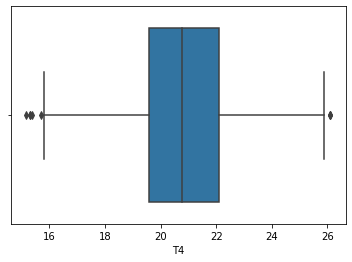

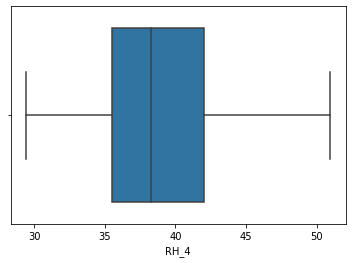

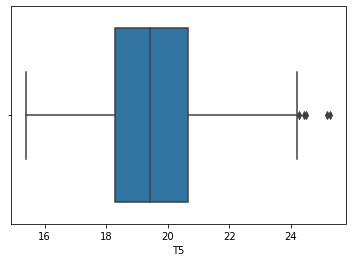

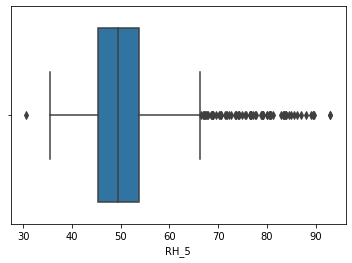

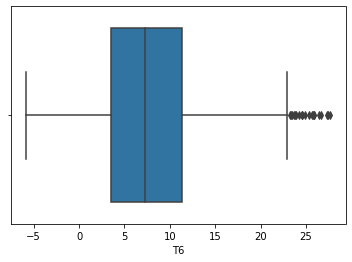

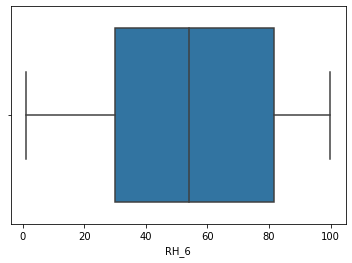

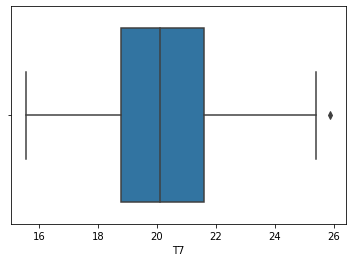

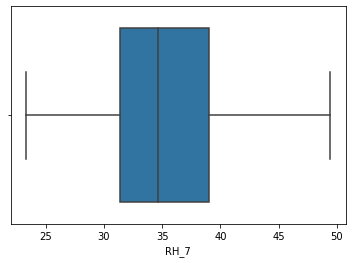

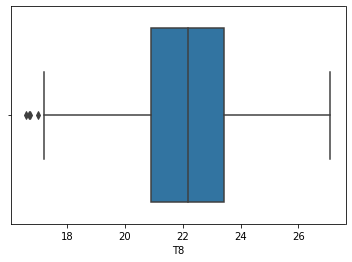

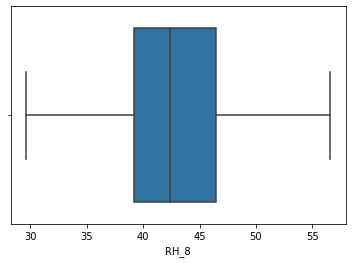

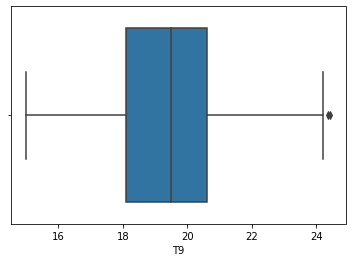

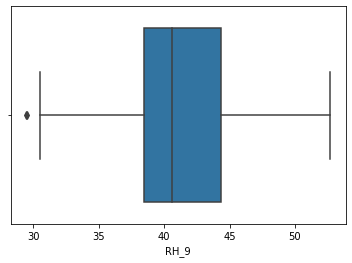

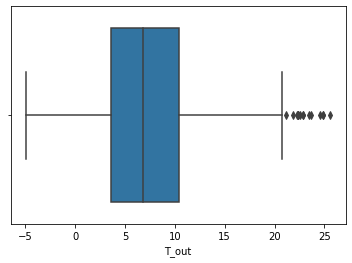

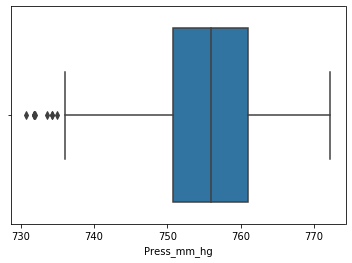

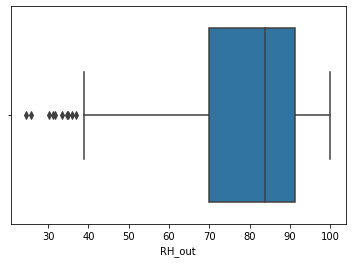

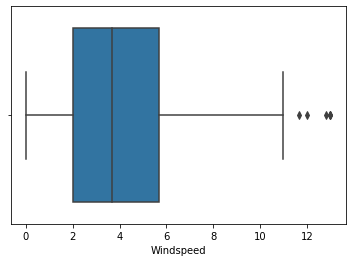

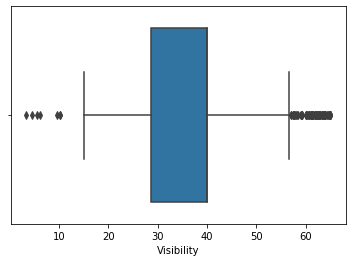

In [9]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

In [10]:
#Capping
for i in data.columns:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    UB=q3+iqr*1.5
    LB=q1-iqr*1.5
    data[i]=data[i].replace(data[data[i]>UB][i],data[i].quantile(0.9))
    data[i]=data[i].replace(data[data[i]<LB][i],data[i].quantile(0.01))

In [11]:
data[data['Appliances']>UB]['Appliances']

0       60
1       60
2       80
4       60
6      100
      ... 
992     60
993     60
995     60
996     70
998     70
Name: Appliances, Length: 616, dtype: int64

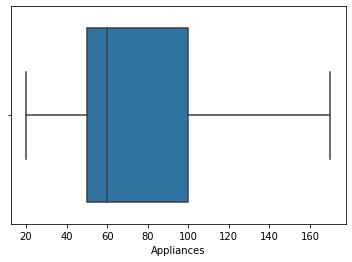

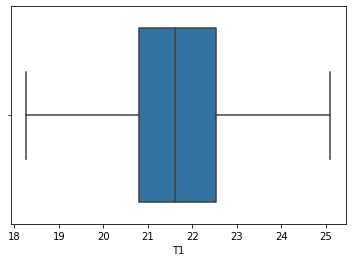

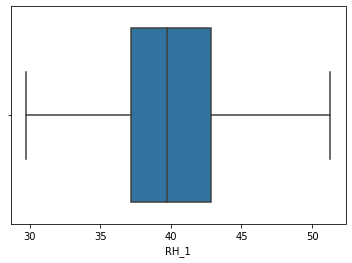

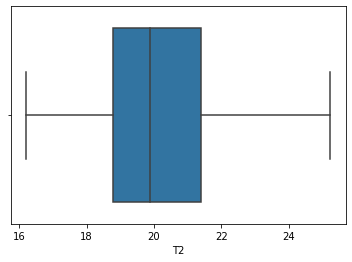

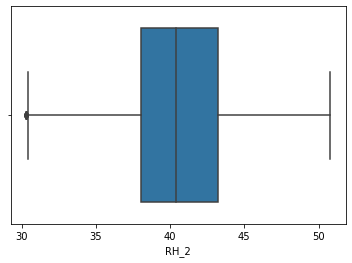

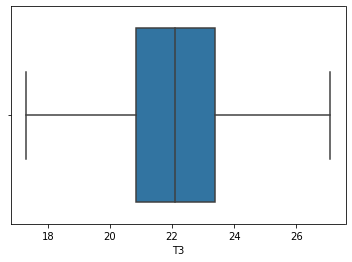

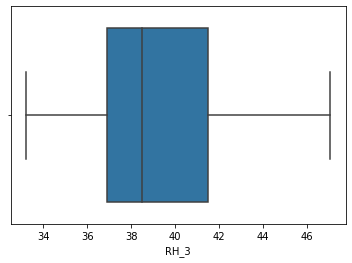

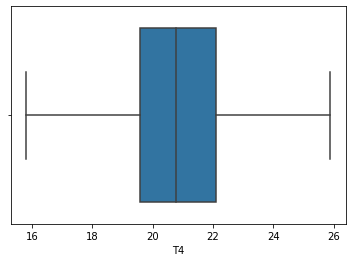

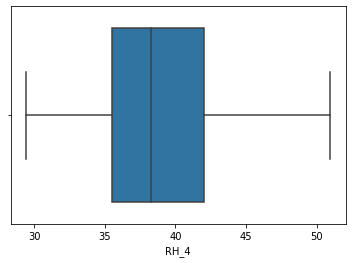

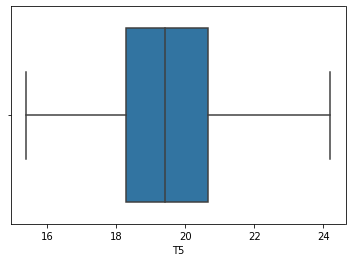

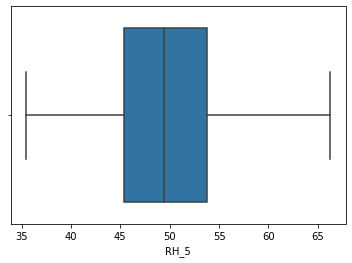

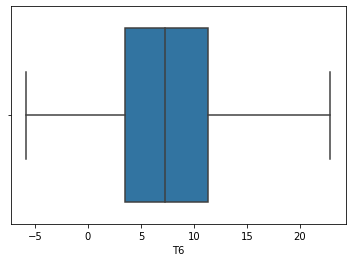

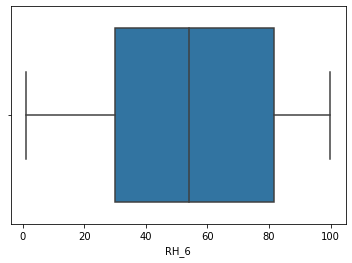

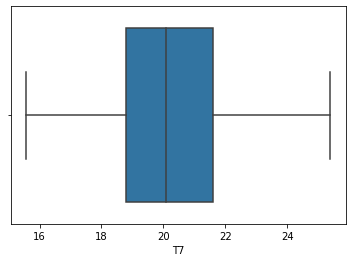

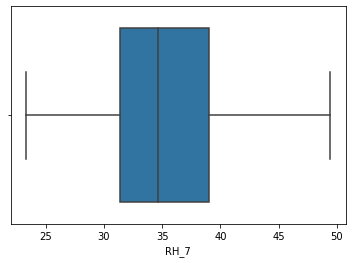

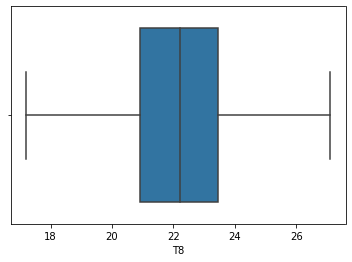

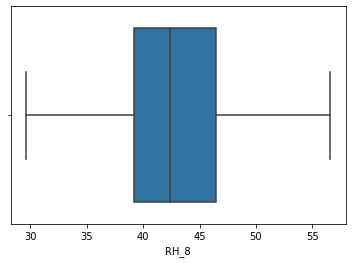

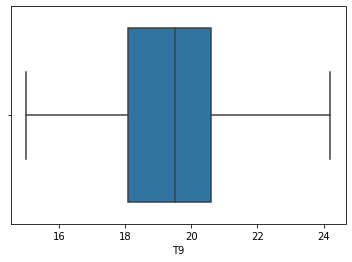

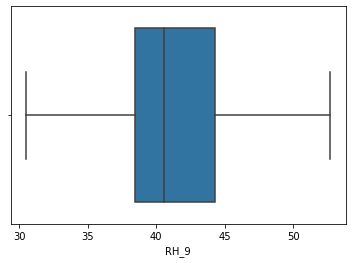

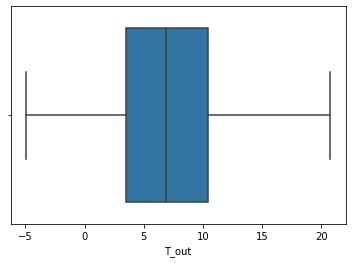

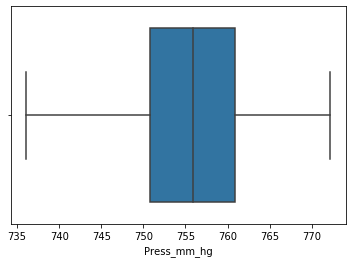

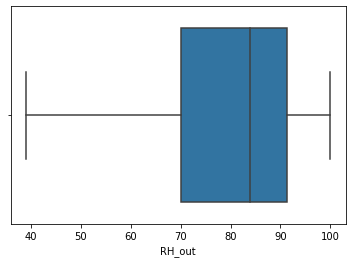

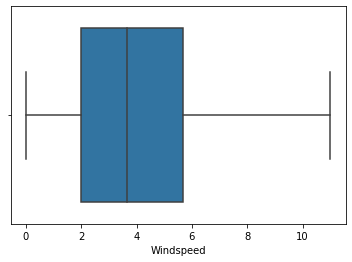

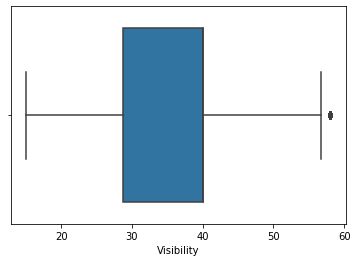

In [12]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

In [13]:
data.skew()

Appliances     1.009202
T1             0.100595
RH_1           0.330445
T2             0.421544
RH_2          -0.175309
T3             0.350893
RH_3           0.457959
T4             0.182580
RH_4           0.468467
T5             0.500558
RH_5           0.420931
T6             0.248866
RH_6          -0.229954
T7             0.240441
RH_7           0.203079
T8            -0.252721
RH_8           0.218797
T9             0.356543
RH_9           0.407775
T_out          0.218348
Press_mm_hg   -0.277383
RH_out        -0.785697
Windspeed      0.695040
Visibility     0.320000
dtype: float64

In [14]:
out=data['Appliances']
box_out,lam=stats.boxcox(out)

In [15]:
box_out=pd.DataFrame(box_out)
box_out.skew()

0    0.004218
dtype: float64

In [16]:
from scipy.special import inv_boxcox
out1=inv_boxcox(box_out,lam)

In [17]:
out1.skew()

0    1.009202
dtype: float64

In [18]:
inp=data.drop('Appliances',axis=1)
inp.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,20.700000,44.700000,19.500000,45.590000,21.390000,41.95,20.566667,45.626667,18.060000,52.900000,...,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,21.290000,37.863333,19.390000,39.663333,21.790000,36.70,20.463333,37.526667,19.390000,43.200000,...,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,21.390000,35.790000,19.290000,37.700000,22.760000,34.29,21.323333,34.730000,18.426667,43.826667,...,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,19.033333,41.826667,18.533333,41.290000,18.100000,43.79,15.890000,47.530000,15.390000,51.030000,...,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,21.700000,46.633333,20.700000,45.900000,22.323333,44.79,21.000000,47.966667,19.600000,56.540556,...,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333


In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc,columns=inp.columns)
inp_sc

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,-0.663466,1.177887,-0.376407,1.308224,-0.464989,0.875121,-0.160226,1.569934,-0.877526,0.467548,...,1.596204,-0.863476,1.904300,-0.620281,1.498392,0.793228,0.133506,0.593248,2.020182,0.029389
1,-0.256704,-0.602866,-0.435506,-0.197814,-0.252984,-0.788362,-0.214045,-0.315813,-0.115952,-1.082950,...,-0.613368,-0.060794,-0.701804,0.053854,-0.632907,0.248368,0.851012,-0.680285,-0.222190,0.201821
2,-0.187761,-1.142910,-0.489233,-0.696721,0.261129,-1.551980,0.233871,-0.966900,-0.667568,-0.982780,...,-1.184758,0.147903,-1.073190,-0.017382,-1.441974,-0.054711,0.923671,-0.703440,-0.432412,-0.205745
3,-1.812513,0.429467,-0.895764,0.215542,-2.208731,1.458132,-2.595983,2.013046,-2.406401,0.168638,...,0.974265,-1.348058,1.572508,-2.291718,1.296531,-0.408870,1.911378,0.847955,0.338403,-1.381414
4,0.025962,1.681464,0.268313,1.386999,0.029690,1.774986,0.065468,2.114706,0.004297,1.049473,...,1.973183,-0.879827,1.981032,-0.628968,2.537694,0.306259,0.274282,1.102661,0.828922,1.643975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.601417,0.107351,-0.555496,-0.010618,-1.095704,0.285773,-0.351197,-0.152071,-0.511054,1.788402,...,0.433687,-0.595915,0.868902,-0.988623,-0.242155,-2.275018,0.830577,0.465895,-0.642635,-1.114929
996,0.232790,-1.296587,-0.396107,-0.833095,-0.464989,-1.485441,-0.252239,-0.624672,0.132180,1.855483,...,-1.153836,0.361952,-0.637132,-0.258889,-1.799487,-0.810705,-0.107177,0.396429,-1.273302,0.201821
997,0.088010,0.568385,-0.304771,1.528455,-0.035679,-0.189508,0.169635,0.150580,0.113093,-0.235771,...,0.235822,-0.173169,-0.156891,0.121615,-0.268097,0.197287,0.088094,0.222766,-0.011968,-1.303036
998,-0.277386,-1.273145,0.160860,-1.636936,-1.048003,-0.991149,0.065468,-1.160131,-0.932879,-0.689198,...,-1.364366,0.989827,-1.732080,-0.154642,-0.663713,0.279016,1.863696,-1.351784,0.828922,-1.303036


In [20]:
#regression part
#Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp_sc.values,i)for i in range(inp_sc.shape[1])]
vif['VIF']
vif['Features']=inp_sc.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
16,23.588606,T9
10,20.561874,T6
18,20.140849,T_out
7,16.907077,RH_4
12,15.267661,T7
2,13.955872,T2
0,13.404370,T1
1,11.995605,RH_1
3,10.731543,RH_2
13,10.309529,RH_7


In [21]:
inp_sc1=inp_sc.drop(['T9','T6','RH_4'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp_sc1.values,i)for i in range(inp_sc1.shape[1])]
vif['VIF']
vif['Features']=inp_sc1.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
0,12.462406,T1
1,11.518129,RH_1
2,11.507273,T2
10,10.715029,T7
3,10.133529,RH_2
11,8.909752,RH_7
13,8.758071,RH_8
5,8.753880,RH_3
4,8.572502,T3
9,8.546468,RH_6


In [22]:
import statsmodels.api as sm 

xc=sm.add_constant(inp_sc1)
result=sm.OLS(box_out,xc).fit()
result.summary()

C:\Users\Neha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     20.96
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           1.75e-62
Time:                        13:40:45   Log-Likelihood:                -96.538
No. Observations:                1000   AIC:                             235.1
Df Residuals:                     979   BIC:                             338.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4560      0.009    405.770      0.000       3.439       3.473
T1             -0.0696      0.030     -2.313      0.021      -0.129      -0.011
RH_1            0.1272      0.029      4.401      0.000       0.070       0.184
T2              0.0228      0.029      0.790      0.430      -0.034       0.080
RH_2           -0.0589      0.027     -2.174      0.030      -0.112      -0.006
T3              0.0988      0.025      3.961      0.000       0.050       0.148
RH_3            0.0731      0.025      2.901      0.004       0.024       0.123
T4              0.0398      0.022      1.787      0.074      -0.004       0.083
T5             -0.0183      0.023     -0.798      0.425      -0.063       0.027
RH_5            0.0197      0.011      1.798      0.072      -0.002       0.041
RH_6            0.0316      0.025      1.271      0.204      -0.017       0.081
T7             -0.1719      0.028     -6.165      0.000      -0.227      -0.117
RH_7            0.0192      0.025      0.755      0.450      -0.031       0.069
T8              0.1840      0.023      7.872      0.000       0.138       0.230
RH_8           -0.2088      0.025     -8.285      0.000      -0.258      -0.159
RH_9           -0.0292      0.021     -1.408      0.160      -0.070       0.011
T_out           0.0096      0.021      0.447      0.655      -0.033       0.052
Press_mm_hg    -0.0015      0.010     -0.144      0.886      -0.021       0.018
RH_out         -0.0157      0.020     -0.804      0.421      -0.054       0.023
Windspeed       0.0287      0.011      2.685      0.007       0.008       0.050
Visibility     -0.0088      0.009     -1.008      0.314      -0.026       0.008
==============================================================================
Omnibus:                        9.007   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               12.487
Skew:                           0.060   Prob(JB):                      0.00194
Kurtosis:                       3.534   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# linearity

In [23]:
residuals=result.resid
predict=result.predict()

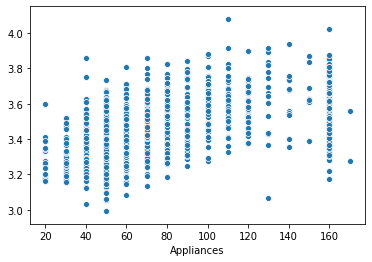

In [24]:
sns.scatterplot(out,predict)

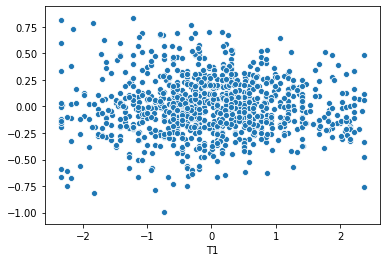

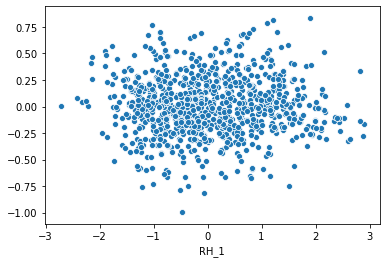

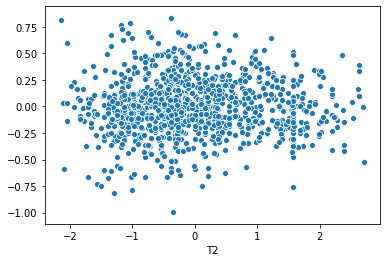

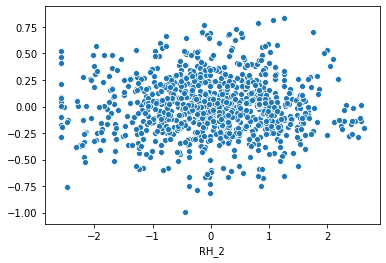

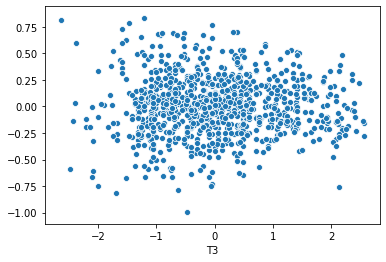

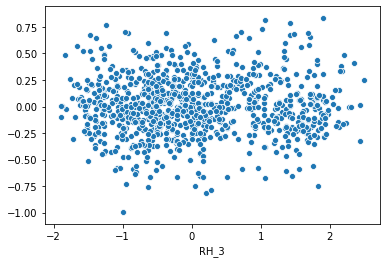

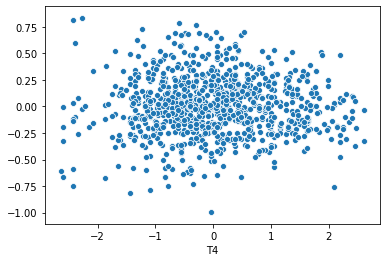

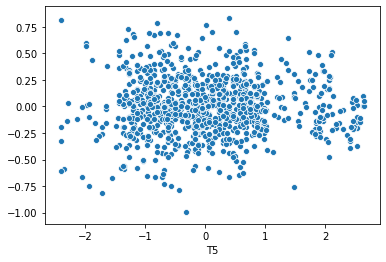

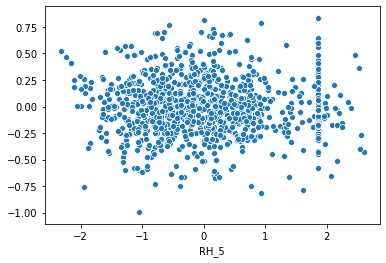

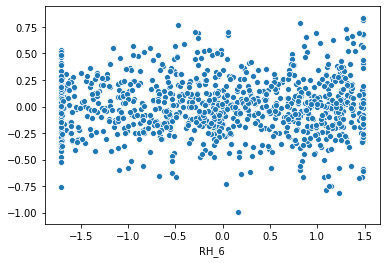

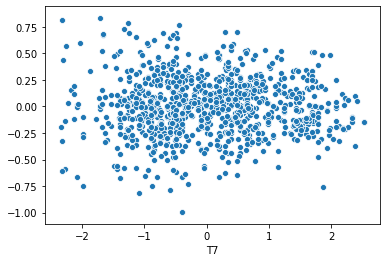

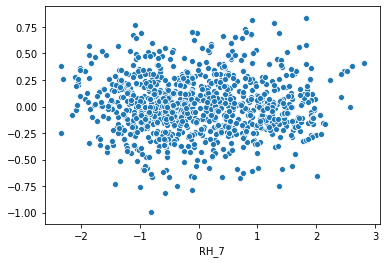

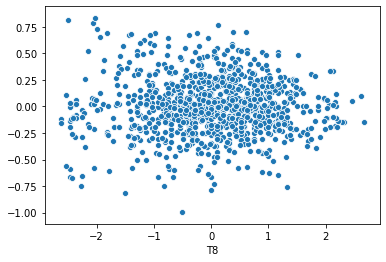

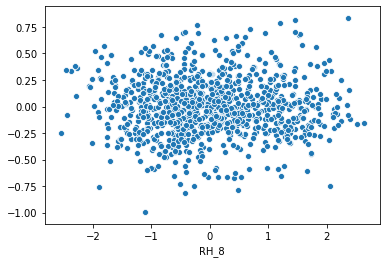

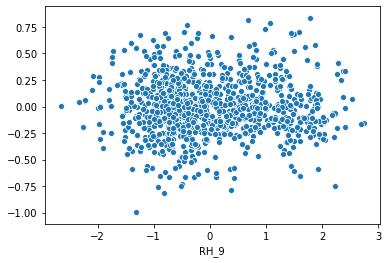

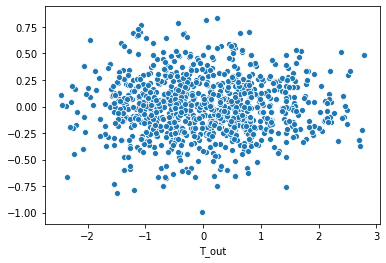

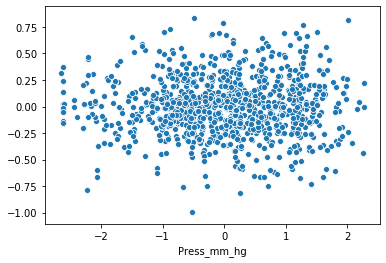

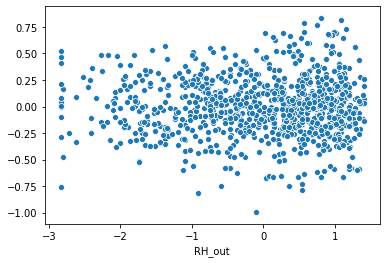

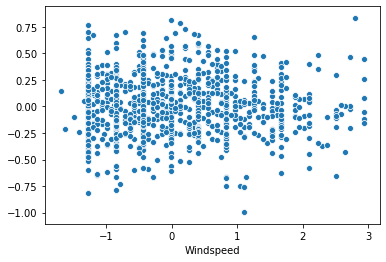

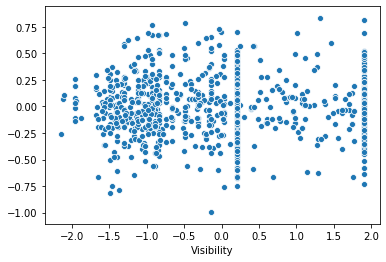

In [25]:
for i in inp_sc1.columns:
    sns.scatterplot(inp_sc1[i],residuals)
    plt.show()

In [26]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(res=result,frac=0.5)

(0.8342197354930532, 0.9774772350901021)

In [27]:
#h0::::(fit of model using full sample)=fit of model using central subset (linear relationship)
#h1:::(fit of model using full sample) is worst to fit of model using central subset 

# we failed to reject null hypo.So this data is linear

# Normality

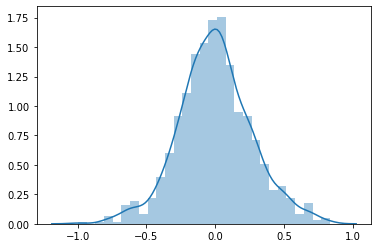

In [28]:
sns.distplot(residuals)

In [29]:
residuals.skew()

0.06039325442448526

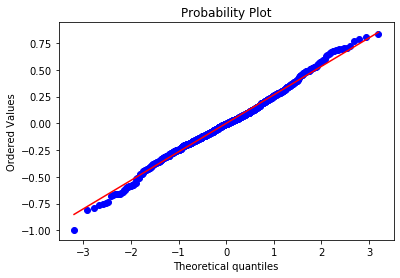

In [30]:
stats.probplot(residuals,plot=plt)
plt.show()


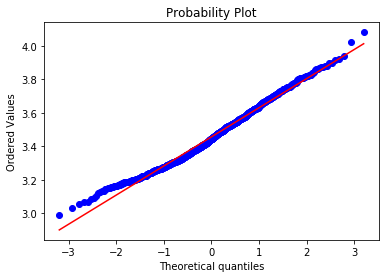

In [31]:
stats.probplot(predict,plot=plt)
plt.show()

In [32]:
#Jarque Bera Test
print(stats.jarque_bera(residuals))

(12.486865432525676, 0.0019431736970489943)


In [33]:
#h0: data is normal 
# h1 : data is not normal

# since prob is less than alpha. we will reject h0 and conclude that residuals r not normal

In [34]:
#transformation 
out2=np.log(out)
out2.skew()

0.12231495266444062

In [35]:
import statsmodels.api as sm 

xc=sm.add_constant(inp_sc1)
result=sm.OLS(out2,xc).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     21.03
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           1.04e-62
Time:                        13:40:51   Log-Likelihood:                -506.83
No. Observations:                1000   AIC:                             1056.
Df Residuals:                     979   BIC:                             1159.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2207      0.013    328.775      0.000       4.196       4.246
T1             -0.1071      0.045     -2.362      0.018      -0.196      -0.018
RH_1            0.1951      0.044      4.477      0.000       0.110       0.281
T2              0.0319      0.044      0.733      0.464      -0.054       0.117
RH_2           -0.0913      0.041     -2.233      0.026      -0.171      -0.011
T3              0.1533      0.038      4.080      0.000       0.080       0.227
RH_3            0.1139      0.038      2.998      0.003       0.039       0.188
T4              0.0576      0.034      1.716      0.086      -0.008       0.123
T5             -0.0289      0.035     -0.837      0.403      -0.097       0.039
RH_5            0.0297      0.017      1.797      0.073      -0.003       0.062
RH_6            0.0490      0.038      1.306      0.192      -0.025       0.123
T7             -0.2582      0.042     -6.144      0.000      -0.341      -0.176
RH_7            0.0268      0.038      0.700      0.484      -0.048       0.102
T8              0.2767      0.035      7.855      0.000       0.208       0.346
RH_8           -0.3154      0.038     -8.303      0.000      -0.390      -0.241
RH_9           -0.0465      0.031     -1.491      0.136      -0.108       0.015
T_out           0.0166      0.032      0.512      0.609      -0.047       0.080
Press_mm_hg    -0.0012      0.015     -0.077      0.938      -0.031       0.029
RH_out         -0.0238      0.029     -0.808      0.419      -0.082       0.034
Windspeed       0.0433      0.016      2.687      0.007       0.012       0.075
Visibility     -0.0130      0.013     -0.984      0.326      -0.039       0.013
==============================================================================
Omnibus:                       11.645   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.710
Skew:                           0.176   Prob(JB):                      0.00105
Kurtosis:                       3.453   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
resid=result.resid

In [37]:
#Jarque Bera Test
print(stats.jarque_bera(resid))

(13.709824613797355, 0.0010542640832282846)


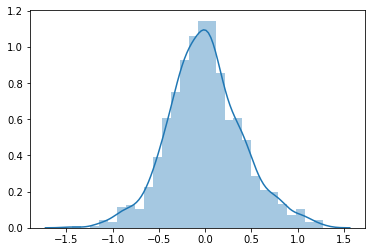

In [38]:
sns.distplot(resid)

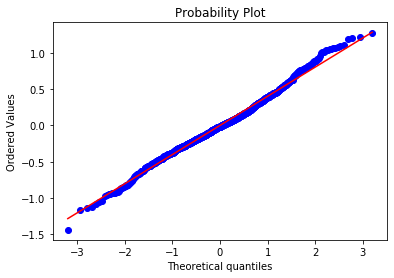

In [39]:
stats.probplot(resid,plot=plt)
plt.show()

In [40]:
# jarque_bera proves data is not normal but when we visualize it on qq plto , it is almost normal data 
# even the skewness is reduced to 0.1 which to almost normal 

# Auto-correlation

In [41]:
#If our Durbin_Watson is in the range of 0.5 -2.5 then it means our data is not in auto correaltion.
#We alwz check that our data is not auto correlated


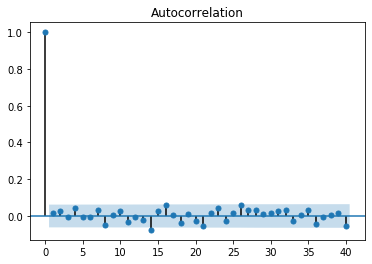

In [42]:
import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(resid,lags=40)

In [43]:
#This indicate weak auto correlation( value of 2 indicate no auto correlation )

# homoscadsacity

In [44]:
# if the residuals goes high and high , it means our data is heteroscadascity
#if iwant my model to be homoscadity, it should be non continouous data or in random . if the data is uniform either increasing or decearsing den it is heteroscadascity

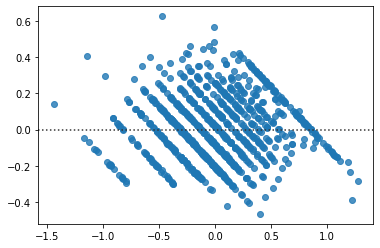

In [45]:
sns.residplot(resid,predict)

In [46]:
import statsmodels.stats.api as sm 

name =['F-stats','p-value']
test=sm.het_goldfeldquandt(y=resid,x=xc)

test

(0.9683981204109421, 0.6372852575074442, 'increasing')

In [47]:
#Ho : variance is constant across the range of data
#H1 : variance is not constant across the range of data

#Since pvalue is more than 0.05 ,we failed to reject  null hypothesis

In [48]:
inpv1=inp_sc1

In [76]:
#backward elimination method for feature selection 


import statsmodels.api as sm 

while(len(inpv1.columns)>0):
    xc=sm.add_constant(inpv1)
    result=sm.OLS(out2,xc).fit()
    result.summary()
    f=result.pvalues[1:].idxmax()
    if result.pvalues[1:].max()>0.05:
        inpv1=inpv1.drop(f,axis=1)
    else:
        break
print("the final features are:",inpv1.columns)

the final features are: Index(['T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T4', 'T7', 'T8', 'RH_8',
       'Windspeed'],
      dtype='object')


C:\Users\Neha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [50]:
xc=sm.add_constant(inpv1)
result=sm.OLS(out2,xc).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     41.02
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           5.84e-68
Time:                        13:46:10   Log-Likelihood:                -512.07
No. Observations:                1000   AIC:                             1046.
Df Residuals:                     989   BIC:                             1100.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2207      0.013    328.722      0.000       4.195       4.246
T1            -0.0824      0.034     -2.397      0.017      -0.150      -0.015
RH_1           0.2207      0.035      6.370      0.000       0.153       0.289
RH_2          -0.1211      0.025     -4.844      0.000      -0.170      -0.072
T3             0.1194      0.033      3.660      0.000       0.055       0.183
RH_3           0.1330      0.033      4.013      0.000       0.068       0.198
T4             0.0629      0.032      1.996      0.046       0.001       0.125
T7            -0.2756      0.036     -7.745      0.000      -0.345      -0.206
T8             0.2776      0.032      8.804      0.000       0.216       0.339
RH_8          -0.3182      0.024    -13.040      0.000      -0.366      -0.270
Windspeed      0.0506      0.014      3.586      0.000       0.023       0.078
==============================================================================
Omnibus:                        8.988   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.883
Skew:                           0.165   Prob(JB):                      0.00714
Kurtosis:                       3.359   Cond. No.                         8.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inp_sc1,out2,test_size=0.3,random_state=40)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

           T1      RH_1        T2      RH_2        T3      RH_3        T4  \
154 -1.221903  1.394078 -0.537587  1.054112 -0.936700  1.588043 -1.033487   
715 -0.387695  0.011845 -0.322680 -0.537477  0.158659  0.001660 -1.345986   
680 -0.094688 -0.723551 -1.241406  0.672944  0.494334 -0.471508 -0.455364   
129 -2.042322 -0.629782 -1.343487 -0.696721 -1.678718  0.360761 -2.335567   
760  2.025303  0.091723  1.484326 -0.104640  1.536693 -0.126137  1.697408   
..        ...       ...       ...       ...       ...       ...       ...   
440  0.088010 -1.244493  1.020486 -2.010481  0.065024 -1.327014  0.846716   
165 -0.387695 -0.178299 -1.182307  0.980419  0.176327 -0.050093 -0.455364   
7    0.552225 -0.239075  0.585300 -0.231696  0.229328 -0.471508  0.169635   
219 -0.387695 -0.654961 -0.627131 -0.283365  0.227561  0.056582 -0.611613   
326  1.835487 -0.569467  1.743528 -1.094720  1.380075 -0.682401  1.687691   

           T5      RH_5      RH_6        T7      RH_7        T8      RH_8  

In [66]:
lr_mod=LinearRegression()
lr_mod.fit(x_train,y_train)
ypred=lr_mod.predict(x_test)

In [67]:
ypred[:5]

array([4.33710393, 4.38561445, 4.4947524 , 3.89018071, 4.35976507])

In [68]:
from sklearn.metrics import mean_squared_error,r2_score


In [71]:
r2_score_test=r2_score(y_test,ypred)
mean_squared_error_test=mean_squared_error(y_test,ypred)
mean_squared_error_test

0.1765158410922283

In [74]:
lr_mod.coef_

array([-1.07768839e-01,  2.12007428e-01,  1.49970142e-02, -1.17304080e-01,
        1.84910931e-01,  1.27649233e-01,  4.32100451e-02, -4.78285890e-02,
        1.89302867e-02,  5.07470239e-02, -2.73053381e-01, -1.68397291e-02,
        2.98337106e-01, -2.98045058e-01, -2.50104499e-02,  3.07025675e-02,
        2.91013314e-04, -2.45052743e-02,  3.18993882e-02, -2.40982367e-02])

In [75]:
lr_mod.intercept_

4.221772445849199

In [54]:
!pip install mlxtend

In [55]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [90]:
lr=LinearRegression()
lr_backward=sfs(estimator=lr,k_features=10,forward=False)
sfs_bkward=lr_backward.fit(x_train,y_train)
sfs_bkward.k_feature_names_

('T1',
 'RH_1',
 'RH_2',
 'T3',
 'RH_3',
 'T7',
 'T8',
 'RH_8',
 'Windspeed',
 'Visibility')

In [91]:
sfs_bkward.k_score_

0.28991338787147825

# forward selection algothrm

In [96]:
#it works with correlation or we can say with r2
lr=LinearRegression()
lr_forward=sfs(estimator=lr,k_features=(10,18),forward=True)
sfs_forward=lr_forward.fit(x_train,y_train)
print(sfs_forward.k_feature_names_)
sfs_forward.k_score_

('T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'RH_6', 'T7', 'T8', 'RH_8', 'RH_out', 'Windspeed', 'Visibility')


0.2896016282610183

In [95]:
#it works with correlation or we can say with r2
lr=LinearRegression()
lr_forward=sfs(estimator=lr,k_features='best',forward=True)
sfs_forward=lr_forward.fit(x_train,y_train)
print(sfs_forward.k_feature_names_)
sfs_forward.k_score_

('T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'RH_6', 'T7', 'T8', 'RH_8', 'RH_out', 'Windspeed', 'Visibility')


0.2896016282610183

In [98]:
lr=LinearRegression()
lr_bkward=sfs(estimator=lr,k_features='best',forward=False)
sfs_bkward=lr_bkward.fit(x_train,y_train)
print(sfs_bkward.k_feature_names_)
sfs_bkward.k_score_

('T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T7', 'T8', 'RH_8', 'Windspeed', 'Visibility')


0.28991338787147825

# Recursive Feature Elimination

In [100]:
from sklearn.feature_selection import RFE

In [111]:
lr=LinearRegression()
rfe_mod=RFE(lr,n_features_to_select=8)
rfe_fit_mod=rfe_mod.fit(x_train,y_train)
rank=rfe_fit_mod.ranking_
res=pd.DataFrame()
res['Feature']=x_train.columns
res['Rank']=rank
res[res['Rank']==1]['Feature']

0       T1
1     RH_1
3     RH_2
4       T3
5     RH_3
10      T7
12      T8
13    RH_8
Name: Feature, dtype: object

# using for loop

In [125]:
for i in [6,7,8,9,10,11,12,14]:
    lr=LinearRegression()
    rfe_mod=RFE(lr,n_features_to_select=i+1)
    rfe_fit_mod=rfe_mod.fit(x_train,y_train)
    rank=rfe_fit_mod.ranking_
    res=pd.DataFrame()
    res['Feature']=x_train.columns
    res['Rank']=rank
    col=res[res['Rank']==1]['Feature']
    lr=LinearRegression()
    
    
    lr.fit(x_train[col],y_train)
    ypred=lr.predict(x_test[col])
    print("feature selection:",i)
    print("r2",r2_score(y_test,ypred))

feature selection: 6
r2 0.2292971261157576
feature selection: 7
r2 0.22305588852020586
feature selection: 8
r2 0.22285561126142095
feature selection: 9
r2 0.22387735432243494
feature selection: 10
r2 0.22812728196466292
feature selection: 11
r2 0.22526123924877195
feature selection: 12
r2 0.2378868725904405
feature selection: 14
r2 0.23709598091477557


# tuning of our model or the quailty of our model

In [135]:
#bias--we can training error. 


lr=LinearRegression()
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [138]:
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)

In [139]:
print(mse_train,mse_test)

0.1564742333451134 0.1765158410922283


In [ ]:
#mse_train is bias error , mse_test is variance error 
#the difference is not really more.. if there is difference more then that it is cllearly indication of over fiting problem 
#when it is called under fit model ,it is called when if the error is very high den its under fit model .For gud model error should be minimum


# Cross validation

In [157]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
res=cross_val_score(lr,inp_sc1,out2,cv=5)
res   # cross_val is using r2 for measure performance

array([0.22859249, 0.28332367, 0.27129902, 0.24170084, 0.27938356])

In [158]:
be=np.mean(res)
be     #bias error

0.2608599156514576

In [159]:
ve=np.std(res)
ve      #variance error 

0.02174845927652128

In [160]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
res=cross_val_score(lr,inp_sc1,out2,cv=5,scoring='neg_mean_squared_error')
res    #cross_value _score is using error to check performance
be=np.mean(abs(res))
be 

0.16911863179744552

In [161]:
ve=np.std(res)
ve      #variance error

0.01435402990027935

In [162]:
#if variance error is less, it means my modelling not overfitting